In [1]:
# Load modules and set-up test problem
import sys
# sys.path.append("..")

import numpy as np
from numpy import array, zeros, ones, exp
import matplotlib.pyplot as plt

from cuqi.model import LinearModel
from cuqi.distribution import Gaussian, JointDistribution, Uniform, Gamma
from cuqi.implicitprior import RegularizedGaussian,RegularizedUnboundedUniform, ConstrainedGaussian
from cuqi.experimental.mcmc import RegularizedLinearRTO, LinearRTO, Conjugate, HybridGibbs, MH
from cuqi.geometry import StepExpansion, MappedGeometry, Discrete

# Plotting limits
min_val = -2
max_val = 4

In [2]:
# Define model and data
x_true = array([1.5, 1.5])
A = LinearModel(array([[1.0, 1.0]]))
y_data = np.array([3.0338])

# Gaussian prior
A Gaussian prior for reference.

In [3]:
# General sampling parameters
num_samples = 200
num_burnin = 10
thining = 2

# Construct posterior
x = Gaussian(zeros(2), 10)
y = Gaussian(A@x, 0.1)
posterior = JointDistribution(x,y)(y = y_data)

# Sample
np.random.seed(88)
sampler = LinearRTO(posterior, maxit = 500)
sampler.sample(num_samples + num_burnin)
samples = sampler.get_samples().burnthin(num_burnin, thining).samples

Sample: 100%|██████████| 210/210 [00:00<00:00, 656.75it/s, acc rate: 100.00%]


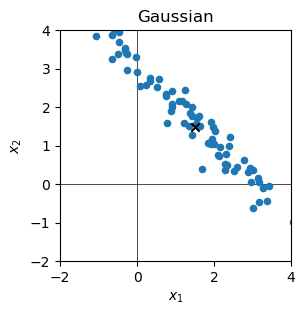

In [4]:
# Create figure
plt.figure(figsize = (3,3))
plt.gca().axhline(y=0, color='k', lw = 0.5, zorder = 1)
plt.gca().axvline(x=0, color='k', lw = 0.5, zorder = 1)

plt.scatter(samples[0], samples[1], s = 20, zorder = 2)
plt.scatter(x_true[0], x_true[1], color = 'k', marker='x', zorder = 3)
plt.title("Gaussian")
plt.xlim((min_val, max_val))
plt.ylim((min_val, max_val))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.gca().set_aspect("equal")

plt.savefig("figures/simplest_linear/gaussian.pdf", bbox_inches = "tight")

# Bounded uniform prior
A uniform prior on a bounded domain.

In [5]:
# General sampling parameters
num_samples = 10000
num_burnin = 100
thining = 100

# Construct posterior
x = Uniform(zeros(2), 2*ones(2))
y = Gaussian(A@x, 0.1)
posterior = JointDistribution(x,y)(y = y_data)

# Sample
np.random.seed(88)
sampler = MH(posterior, scale = 0.5)
sampler.sample(num_samples + num_burnin)
samples = sampler.get_samples().burnthin(num_burnin, thining).samples

Sample: 100%|██████████| 10100/10100 [00:20<00:00, 503.60it/s, acc rate: 31.48%]


array([[<Axes: title={'center': 'x0'}>, <Axes: title={'center': 'x0'}>],
       [<Axes: title={'center': 'x1'}>, <Axes: title={'center': 'x1'}>]],
      dtype=object)

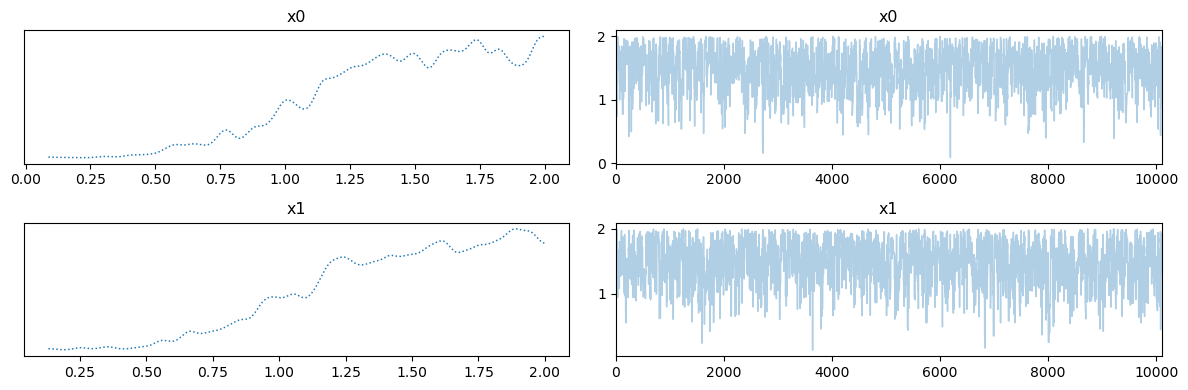

In [6]:
# Plot trace to verify convergence
sampler.get_samples().plot_trace()

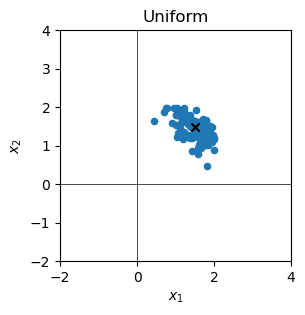

In [7]:
# Create figure
plt.figure(figsize = (3,3))
plt.gca().axhline(y=0, color='k', lw = 0.5, zorder = 1)
plt.gca().axvline(x=0, color='k', lw = 0.5, zorder = 1)

plt.scatter(samples[0], samples[1], s = 20, zorder = 2)
plt.scatter(x_true[0], x_true[1], color = 'k', marker='x', zorder = 3)
plt.title("Uniform")
plt.xlim((min_val, max_val))
plt.ylim((min_val, max_val))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.gca().set_aspect("equal")

plt.savefig("figures/simplest_linear/uniform.pdf", bbox_inches = "tight")

# Nonnegativity constrained RLRTO
A nonnegativity constrained prior using nonnegativity constained RLRTO.

In [8]:
# General sampling parameters
num_samples = 200
num_burnin = 10
thining = 2

# Construct posterior
x = ConstrainedGaussian(np.zeros(2), 10, constraint="nonnegativity")
y = Gaussian(A@x, 0.1)
posterior = JointDistribution(x,y)(y = y_data)

# Sample
np.random.seed(88)
sampler = RegularizedLinearRTO(posterior, maxit = 500)
sampler.sample(num_samples + num_burnin)
samples = sampler.get_samples().burnthin(num_burnin, thining).samples

Sample: 100%|██████████| 210/210 [00:09<00:00, 21.09it/s, acc rate: 100.00%]


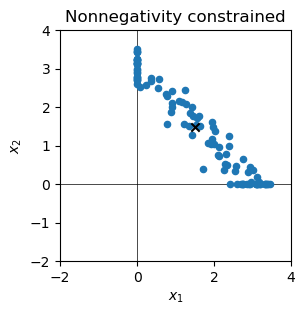

In [9]:
# Create figure
plt.figure(figsize = (3,3))
plt.gca().axhline(y=0, color='k', lw = 0.5, zorder = 1)
plt.gca().axvline(x=0, color='k', lw = 0.5, zorder = 1)

plt.scatter(samples[0], samples[1], s = 20, zorder = 2)
plt.scatter(x_true[0], x_true[1], color = 'k', marker='x', zorder = 3)
plt.title("Nonnegativity constrained")
plt.xlim((min_val, max_val))
plt.ylim((min_val, max_val))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.gca().set_aspect("equal")

plt.savefig("figures/simplest_linear/nonnegative.pdf", bbox_inches = "tight")

# TV regularized RLRTO
A RLRTO prior with Total Variation regularization

In [10]:
# General sampling parameters
num_samples = 200
num_burnin = 10
thining = 2

# Construct posterior
x = RegularizedGaussian(np.zeros(2), 10, regularization="TV", strength = 0.2, geometry = A.domain_geometry)
y = Gaussian(A@x, 0.1)
posterior = JointDistribution(x,y)(y = y_data)

# Sample
np.random.seed(88)
sampler = RegularizedLinearRTO(posterior, maxit = 500, penalty_parameter = 1000)
sampler.sample(num_samples + num_burnin)
samples = sampler.get_samples().burnthin(num_burnin, thining).samples

Sample: 100%|██████████| 210/210 [00:56<00:00,  3.69it/s, acc rate: 100.00%]


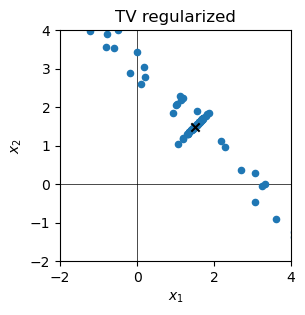

In [11]:
plt.figure(figsize = (3,3))
plt.gca().axhline(y=0, color='k', lw = 0.5, zorder = 1)
plt.gca().axvline(x=0, color='k', lw = 0.5, zorder = 1)

plt.scatter(samples[0], samples[1], s = 20, zorder = 2)
plt.scatter(x_true[0], x_true[1], color = 'k', marker='x', zorder = 3)
plt.title("TV regularized")
plt.xlim((min_val, max_val))
plt.ylim((min_val, max_val))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.gca().set_aspect("equal")

plt.savefig("figures/simplest_linear/TV.pdf", bbox_inches = "tight")

# Step expansion
Equate the two unknown coefficents using a stepexpansion with a single step.

In [12]:
# General sampling parameters
num_samples = 200
num_burnin = 10
thining = 2

# Use geometry to create a latent variable model
geom = StepExpansion([0,1], 1)
A_step = LinearModel(array([[1.0, 1.0]]), domain_geometry=geom)

# Construct posterior
x = Gaussian(zeros(1),  1)
y = Gaussian(A_step(x), 0.1)
joint = JointDistribution(x,y)
posterior = joint(y = y_data)

# Sample
np.random.seed(88)
sampler = LinearRTO(posterior)
sampler.sample(num_samples + num_burnin)
samples = sampler.get_samples().burnthin(num_burnin, thining).samples

Sample: 100%|██████████| 210/210 [00:00<00:00, 285.55it/s, acc rate: 100.00%]


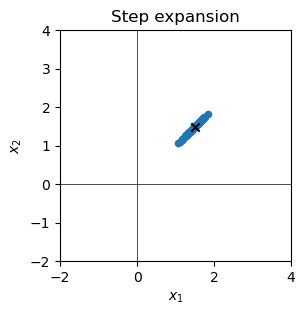

In [13]:
plt.figure(figsize = (3,3))
plt.gca().axhline(y=0, color='k', lw = 0.5, zorder = 1)
plt.gca().axvline(x=0, color='k', lw = 0.5, zorder = 1)

plt.scatter(samples, samples, s = 20, zorder = 2)
plt.scatter(x_true[0], x_true[1], color = 'k', marker='x', zorder = 3)
plt.title("Step expansion")
plt.xlim((min_val, max_val))
plt.ylim((min_val, max_val))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.gca().set_aspect("equal")

plt.savefig("figures/simplest_linear/step.pdf", bbox_inches = "tight")

# Exponential transformation/log normal
A log normal prior achieved by transforming a Gaussian distribution using an exponential function.

In [14]:
# General sampling parameters
num_samples = 10000
num_burnin = 100
thining = 100

# Use geometry to create a latent variable model
geom = MappedGeometry(Discrete(2), lambda x: exp(x))
A_exp = LinearModel(array([[1.0, 1.0]]), domain_geometry=geom)

# Construct posterior
x = Gaussian(zeros(2),  1)
y = Gaussian(A_exp(x), 0.1)
joint = JointDistribution(x,y)
posterior = joint(y = y_data)

# Sample
np.random.seed(88)
sampler = MH(posterior, scale = 0.5)
sampler.sample(num_samples + num_burnin)
samples = sampler.get_samples().burnthin(num_burnin, thining).samples

Sample: 100%|██████████| 10100/10100 [00:20<00:00, 488.54it/s, acc rate: 29.32%]


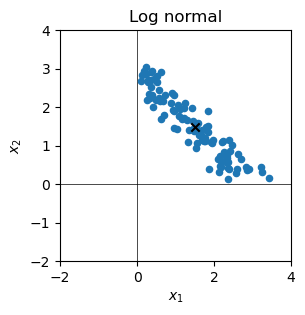

In [15]:
# Create figure
plt.figure(figsize = (3,3))
plt.gca().axhline(y=0, color='k', lw = 0.5, zorder = 1)
plt.gca().axvline(x=0, color='k', lw = 0.5, zorder = 1)

plt.scatter(geom.par2fun(samples[0]), geom.par2fun(samples[1]), s = 20, zorder = 2)
plt.scatter(x_true[0], x_true[1], color = 'k', marker='x', zorder = 3)
plt.title("Log normal")
plt.xlim((min_val, max_val))
plt.ylim((min_val, max_val))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.gca().set_aspect("equal")

plt.savefig("figures/simplest_linear/lognormal.pdf", bbox_inches = "tight")

# Hierarchical model
A hierarchical model using RLRTO with a hyperprior on the noise level and the regularization strength.
Note: The RuntimeWarning is expected due to RegularizedUnboundedUniform being realized using RegularizedGaussian with zero precision. This warning can be ignored.

In [16]:
# General sampling parameters
num_samples = 1000
num_burnin = 10
thining = 5

# Construct posterior
d = Gamma(1, 1e-4)
l = Gamma(1, 1e-4)
x = RegularizedUnboundedUniform(regularization="TV", strength = lambda d : d,
                                geometry = A.domain_geometry)
y = Gaussian(A@x, prec = lambda l : l)
posterior = JointDistribution(d,l,x,y)(y = y_data)

# Sample
np.random.seed(88)
sampling_strategy = {
            'd': Conjugate(),
            'l': Conjugate(),
            'x': RegularizedLinearRTO(maxit = 100, penalty_parameter = 1000)
            }

sampler = HybridGibbs(posterior, sampling_strategy)
sampler.sample(num_samples + num_burnin)
gibbs_samples_x = sampler.get_samples()['x'].burnthin(num_burnin, thining).samples
gibbs_samples_d = sampler.get_samples()['d'].burnthin(num_burnin, thining).samples
gibbs_samples_l = sampler.get_samples()['l'].burnthin(num_burnin, thining).samples

c:\Users\jmev\Documents\git_repos\CUQIpy\cuqi\distribution\_gaussian.py:681: RuntimeWarning: divide by zero encountered in log
  logdet = np.sum(-np.log(precision))
Sample:   0%|          | 0/1010 [00:00<?, ?it/s]c:\Users\jmev\Documents\git_repos\CUQIpy\cuqi\solver\_solver.py:347: RuntimeWarning: invalid value encountered in scalar divide
  p = s + (gamma/gamma1)*p
Sample: 100%|██████████| 1010/1010 [01:01<00:00, 16.45it/s]


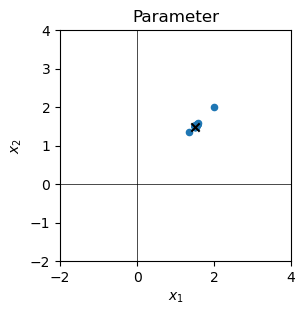

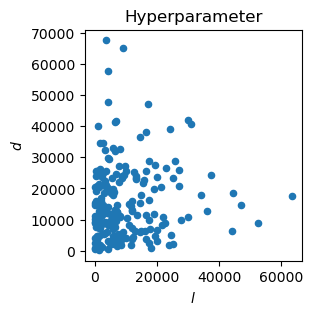

In [17]:
# Create figure
plt.figure(figsize = (3,3))
plt.gca().axhline(y=0, color='k', lw = 0.5, zorder = 1)
plt.gca().axvline(x=0, color='k', lw = 0.5, zorder = 1)

plt.scatter(gibbs_samples_x[0, :], gibbs_samples_x[1, :], s = 20, zorder = 2)
plt.scatter(x_true[0], x_true[1], color = 'k', marker='x', zorder = 3)
plt.title("Parameter")
plt.xlim((min_val, max_val))
plt.ylim((min_val, max_val))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.gca().set_aspect("equal")

plt.savefig("figures/simplest_linear/hierarchical_parameter.pdf", bbox_inches = "tight")

plt.figure(figsize = (3,3))
plt.scatter(gibbs_samples_l, gibbs_samples_d, s = 20, zorder = 2)

plt.title("Hyperparameter")
plt.xlabel("$l$")
plt.ylabel("$d$")
plt.gca().set_aspect("equal")

plt.savefig("figures/simplest_linear/hierarchical_hyperparameter.pdf", bbox_inches = "tight")